In [3]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

folder_data = "/Odyssey/private/t22picar/data/glorys_2020_15m/"
file_glorys = "glorys_15.81m_2020-01-20-2021-04-20.nc"
maps_glorys = xr.open_dataset(folder_data+file_glorys)
#lat_simu = maps_glorys.latitude.values
#lon_simu = maps_glorys.longitude.values
#sst_simu = maps_glorys.thetao.values[0,:]


folder_data_4th = "/Odyssey/public/glorys/reanalysis/"
file_glorys_4th = "glorys12_multivar_2020_4th.nc"
maps_4th = xr.open_dataset(folder_data_4th+file_glorys_4th)


In [4]:
maps_glorys = maps_glorys.rename({"latitude": "lat"})
maps_glorys = maps_glorys.rename({"longitude": "lon"})

In [3]:
# Original grid 1/12 (2041,4320) --> 1/4
new_sizes = [size // 3 for size in (2041, 4320)]
print('new sizes: {}'.format(new_sizes))

new sizes: [680, 1440]


In [4]:
def regrid_da(regrid_sizes, da: xr.DataArray):

        lat_space = np.linspace(start=da.lat.min(), stop=da.lat.max(), num=regrid_sizes[0])
        lon_space = np.linspace(start=da.lon.min(), stop=da.lon.max(), num=regrid_sizes[1])

        new_da = da.interp({"lat":lat_space, "lon":lon_space}, method="linear")

        return new_da

In [5]:
maps_glorys_4th = regrid_da(new_sizes,maps_glorys)

In [6]:
sst_4th = maps_4th.thetao.values[19,:]
lat_4th = maps_4th.lat.values
lon_4th = maps_4th.lon.values

In [7]:
maps_4th.thetao[19,:]

<xarray.DataArray 'thetao' (lat: 680, lon: 1440)> Size: 8MB
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [-1.688179, -1.688179, -1.688905, ..., -1.688179, -1.688179, -1.688179],
       [-1.685259, -1.685259, -1.685259, ..., -1.685259, -1.685259, -1.685259],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan]])
Coordinates:
    depth    float32 4B ...
    time     datetime64[ns] 8B 2020-01-20
  * lat      (lat) float64 5kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.4 179.7 179.9
Attributes:
    cell_methods:   area: mean
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    unit_long:      Degrees Celsius
    units:          degrees_C
    valid_max:      21306
    valid_min:      -32766

In [8]:
sst_4th_theo = maps_glorys_4th.thetao.values[0,:]
lat_4th_theo = maps_glorys_4th.lat.values
lon_4th_theo = maps_glorys_4th.lon.values

In [9]:
import sys
sys.path.append("/Odyssey/private/t22picar/tools/")
from plot_tools import plot_map_zoom

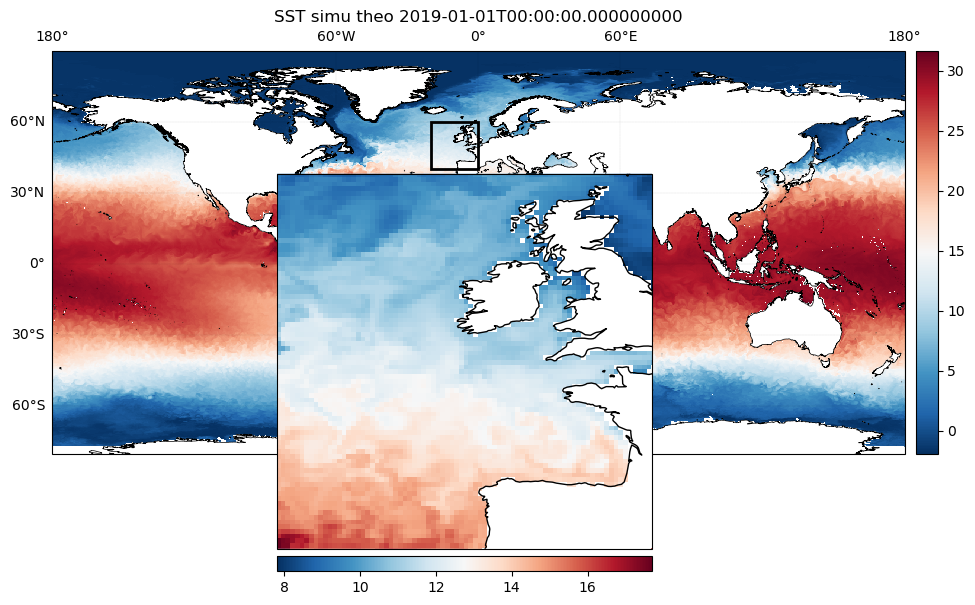

In [10]:
plot_map_zoom(sst_4th_theo[0,:],lon_4th_theo,lat_4th_theo,title="SST simu theo {0}".format(maps_glorys.time.values[0]))

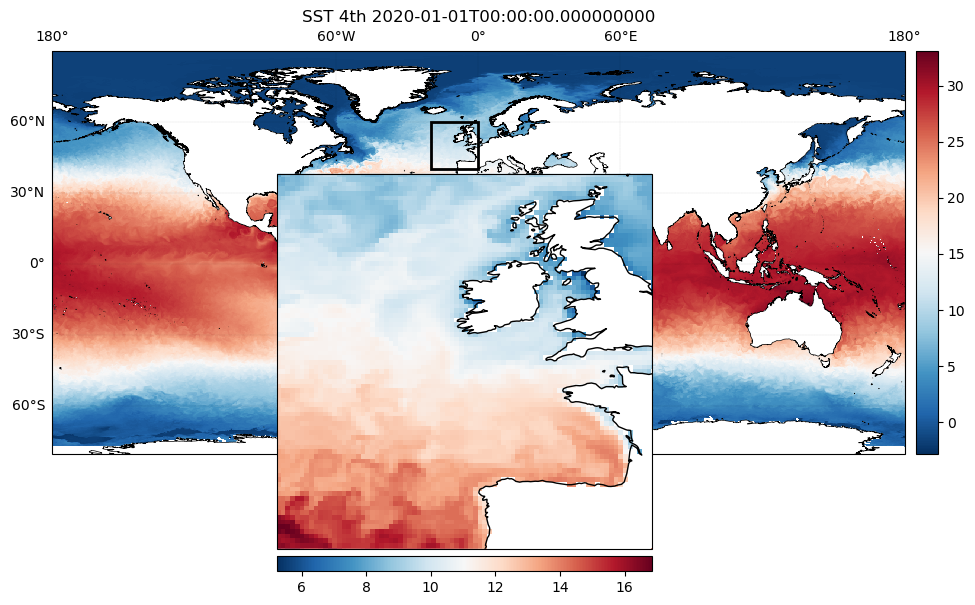

In [11]:
plot_map_zoom(sst_4th,lon_4th,lat_4th,title="SST 4th {0}".format(maps_4th.time.values[0]))

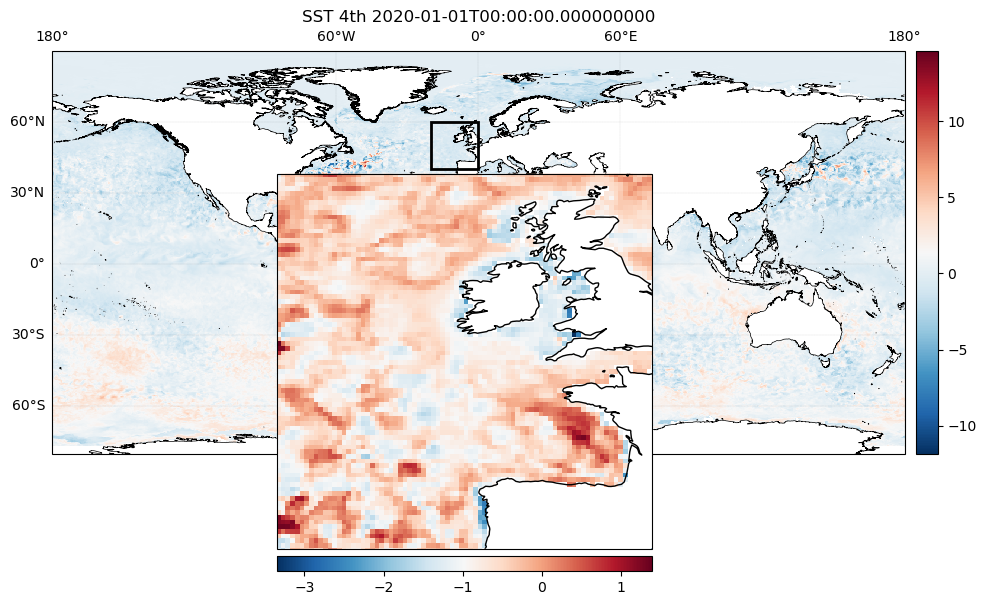

In [12]:
plot_map_zoom(sst_4th-sst_4th_theo[0,:],lon_4th,lat_4th,title="SST 4th {0}".format(maps_4th.time.values[0]))

In [5]:
maps_glorys = maps_glorys.sel(depth=maps_glorys.depth[0])
maps_glorys

<xarray.Dataset> Size: 161GB
Dimensions:  (lat: 2041, lon: 4320, time: 457)
Coordinates:
    depth    float32 4B 15.81
  * lat      (lat) float32 8kB -80.0 -79.92 -79.83 -79.75 ... 89.83 89.92 90.0
  * lon      (lon) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.8 179.9
  * time     (time) datetime64[ns] 4kB 2020-01-20 2020-01-21 ... 2021-04-20
Data variables:
    mlotst   (time, lat, lon) float64 32GB ...
    uo       (time, lat, lon) float64 32GB ...
    vo       (time, lat, lon) float64 32GB ...
    zos      (time, lat, lon) float64 32GB ...
    thetao   (time, lat, lon) float64 32GB ...
Attributes:
    references:                http://www.mercator-ocean.fr
    comment:                   CMEMS product
    title:                     daily mean fields from Global Ocean Physics An...
    source:                    MERCATOR GLORYS12V1
    institution:               MERCATOR OCEAN
    history:                   2023/06/01 16:20:05 MERCATOR OCEAN Netcdf crea...
    Conventions:               CF-1.4
    copernicusmarine_version:  2.0.1

In [7]:
# save data 
save_file=file_glorys[:-3]+"_12th"+".nc"
# Sauvegarder le DataArray en fichier NetCDF
maps_glorys.to_netcdf(folder_data+save_file)


In [1]:
# Add cloud to sst glorys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.ticker as mticker

file_glorys = "glorys_15.81m_2020-01-20-2021-04-20.nc"
save_file=file_glorys[:-3]+"_4th"+".nc"
folder_data = "/Odyssey/private/t22picar/data/glorys_2020_15m/"

maps_glorys_4th = xr.open_dataset(folder_data+save_file)

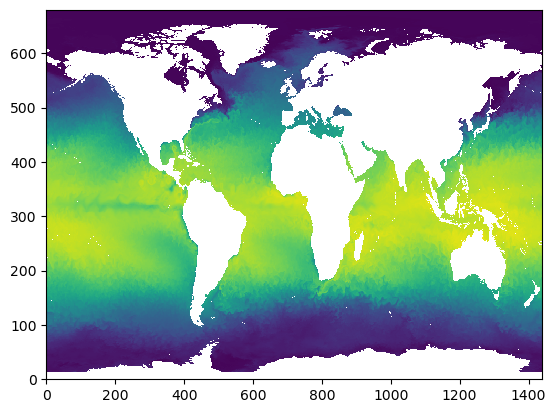

In [6]:
plt.pcolormesh(maps_glorys_4th.thetao[400,:])

<xarray.Dataset> Size: 18GB
Dimensions:  (time: 457, lat: 680, lon: 1440)
Coordinates:
    depth    float32 4B 15.81
  * time     (time) datetime64[ns] 4kB 2020-01-20 2020-01-21 ... 2021-04-20
  * lat      (lat) float64 5kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.4 179.7 179.9
Data variables:
    mlotst   (time, lat, lon) float64 4GB ...
    uo       (time, lat, lon) float64 4GB ...
    vo       (time, lat, lon) float64 4GB ...
    zos      (time, lat, lon) float64 4GB ...
    thetao   (time, lat, lon) float64 4GB ...
Attributes:
    references:                http://www.mercator-ocean.fr
    comment:                   CMEMS product
    title:                     daily mean fields from Global Ocean Physics An...
    source:                    MERCATOR GLORYS12V1
    institution:               MERCATOR OCEAN
    history:                   2023/06/01 16:20:05 MERCATOR OCEAN Netcdf crea...
    Conventions:               CF-1.4
    copernicusmarine_version:  2.0.1

In [6]:
maps_glorys

<xarray.Dataset> Size: 18GB
Dimensions:  (depth: 1, time: 457, lat: 680, lon: 1440)
Coordinates:
  * depth    (depth) float32 4B 15.81
  * time     (time) datetime64[ns] 4kB 2020-01-20 2020-01-21 ... 2021-04-20
  * lat      (lat) float64 5kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.4 179.7 179.9
Data variables:
    mlotst   (time, lat, lon) float64 4GB ...
    uo       (time, depth, lat, lon) float64 4GB ...
    vo       (time, depth, lat, lon) float64 4GB ...
    zos      (time, lat, lon) float64 4GB ...
    thetao   (time, depth, lat, lon) float64 4GB ...
Attributes:
    references:                http://www.mercator-ocean.fr
    comment:                   CMEMS product
    title:                     daily mean fields from Global Ocean Physics An...
    source:                    MERCATOR GLORYS12V1
    institution:               MERCATOR OCEAN
    history:                   2023/06/01 16:20:05 MERCATOR OCEAN Netcdf crea...
    Conventions:               CF-1.4
    copernicusmarine_version:  2.0.1

NameError: name 'maps_glorys' is not defined

In [8]:

folder_data_4th = "/Odyssey/public/glorys/reanalysis/"
file_glorys_4th = "glorys12_multivar_2020_4th.nc"
maps_4th = xr.open_dataset(folder_data_4th+file_glorys_4th)

In [9]:
maps_4th

<xarray.Dataset> Size: 17GB
Dimensions:  (time: 366, lat: 680, lon: 1440)
Coordinates:
    depth    float32 4B ...
  * time     (time) datetime64[ns] 3kB 2020-01-01 2020-01-02 ... 2020-12-31
  * lat      (lat) float64 5kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.4 179.7 179.9
Data variables:
    so       (time, lat, lon) float64 3GB ...
    thetao   (time, lat, lon) float64 3GB ...
    uo       (time, lat, lon) float64 3GB ...
    vo       (time, lat, lon) float64 3GB ...
    zos      (time, lat, lon) float64 3GB ...
    mlotst   (time, lat, lon) float64 3GB ...
Attributes: (12/25)
    Conventions:               CF-1.4
    bulletin_date:             2021-07-07 00:00:00
    bulletin_type:             operational
    comment:                   CMEMS product
    domain_name:               GL12
    easting:                   longitude
    ...                        ...
    references:                http://www.mercator-ocean.fr
    source:                    MERCATOR GLORYS12V1
    title:                     daily mean fields from Global Ocean Physics An...
    z_max:                     5727.9169921875
    z_min:                     0.49402499198913574
    copernicusmarine_version:  1.2.1